# Mass Transit: Project Part 1

It's your first day on the job. Your first task is to analyze the Mass Transit Data and present general insights. You will build histograms, boxplots and scatter plots, along with analyzing the mean, median, max, min and quartiles to present compelling insights and to look for interesting patterns.

Whenever you come across a cell with code in it, go ahead and run it. When you are prompted for your own solution, write your code in the blank Python cell and run that as well. If you get errors, don't worry, just go back and look at your code. Some errors are easily corrected. Other errors may need support from Stackoverflow or your classmates. Just be patient, and keep in mind that we all mistakes. The solutions will be made available to you.

### 1. Imports

Since you are working in Python in a Jupyter Notebook, you want to use the following standard imports.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

441 ns ± 4.13 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### 2. Access Data

Next, you need to access the data as follows.

In [15]:
df = pd.read_csv('uber_every_1K_rows.csv', parse_dates=['Trip Start Timestamp', 'Trip End Timestamp'])

11 s ± 1.61 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


1. df is standard terminology. It stands for dataFrame. Throughout this project, whenever you see df, it's a reference to the data.

2. Notice that parse_dates=['Trip Start Timestamp', 'Trip End Timestamp']. This is very important. It allows us to treat these columns as dates. This will be useful later on.


### 3. View Data

It's always a good idea to view the data. .head() is a method that shows you the first five rows. Use .head() following df to view the first 5 rows in the cell below.

In [6]:
df.head()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,10c7f5b6e72604b2d61676539c794cae46a7892a,2019-01-11 20:00:00,2019-01-11 20:15:00,878.0,4.5,NaN,NaN,43.0,51.0,10.0,...,2.55,12.55,False,1,41.761578,-87.572782,POINT (-87.5727819867 41.7615779081),41.690633,-87.570058,POINT (-87.5700582686 41.6906333472)
1,10c9d0549abb476c40d28b6e8655236fc5c8337c,2019-01-04 03:15:00,2019-01-04 03:30:00,788.0,4.9,NaN,NaN,7.0,8.0,10.0,...,2.55,12.55,False,1,41.922686,-87.649489,POINT (-87.6494887289 41.9226862843),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
2,10cbc009f37188202e8cfaddcc8c9ebbccc78b06,2018-12-04 02:30:00,2018-12-04 02:45:00,862.0,6.5,NaN,NaN,39.0,32.0,10.0,...,2.50,13.50,False,1,41.808916,-87.596183,POINT (-87.5961833442 41.8089162826),41.878866,-87.625192,POINT (-87.6251921424 41.8788655841)
3,10cda8e401a74790b1deb7a9de194bf526b28fcc,2019-01-14 04:15:00,2019-01-14 04:15:00,708.0,2.6,1.703184e+10,1.703184e+10,34.0,31.0,7.5,...,0.00,7.50,True,1,41.851018,-87.635092,POINT (-87.6350918563 41.8510178239),41.847432,-87.663529,POINT (-87.6635286858 41.8474315472)
4,10cfaf1cb74d19ac8e71937512b7b526df49cb2c,2018-11-05 00:30:00,2018-11-05 00:45:00,539.0,1.9,1.703107e+10,1.703108e+10,7.0,8.0,5.0,...,2.50,7.50,False,1,41.914586,-87.645966,POINT (-87.6459662069 41.9145857091),41.899156,-87.626211,POINT (-87.6262105324 41.8991556134)


Take a moment to examine the data. Lots of interesting stuff. Notice the NaN values? These need to be dealt with. First, let's analyze the data using .describe()

### 4. Describe Data

.describe() is a great method for viewing the core statistics at once. Use .describe() with df to view the core statistics in the cell below.

In [7]:
df.describe()

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
count,45335.000000,45338.000000,3.277200e+04,3.261500e+04,42630.000000,42319.000000,45338.000000,45338.000000,45338.000000,45338.000000,45338.000000,42663.000000,42663.000000,42339.000000,42339.000000
mean,1050.394993,5.843617,1.703136e+10,1.703138e+10,25.295825,25.873083,10.778541,0.522740,2.802098,14.103380,1.329481,41.892467,-87.665717,41.893435,-87.667936
std,736.613534,6.347701,3.326601e+05,3.383880e+05,20.164720,20.552015,8.898413,1.501123,1.862349,10.541434,0.806980,0.061407,0.059872,0.061396,0.063759
min,3.000000,0.000000,1.703101e+10,1.703101e+10,1.000000,1.000000,0.000000,0.000000,0.000000,0.670000,1.000000,41.650222,-87.913625,41.650222,-87.913625
25%,527.000000,1.800000,1.703108e+10,1.703108e+10,8.000000,8.000000,5.000000,0.000000,2.500000,7.550000,1.000000,41.877406,-87.679955,41.878667,-87.683227
50%,854.000000,3.600000,1.703124e+10,1.703124e+10,24.000000,24.000000,7.500000,0.000000,2.550000,10.050000,1.000000,41.893216,-87.652274,41.893216,-87.651970
75%,1378.000000,7.300000,1.703183e+10,1.703183e+10,32.000000,32.000000,12.500000,0.000000,2.550000,15.500000,1.000000,41.929078,-87.631864,41.930579,-87.631864
max,9154.000000,151.700000,1.703198e+10,1.703198e+10,77.000000,77.000000,170.000000,31.000000,20.950000,206.890000,14.000000,42.021224,-87.534903,42.021224,-87.530712


##### Write a paragraph stating insights from the data above.

SOLUTOIN .describe() shows the count, the quartiles, and the median mean. The mean is usually greater than the median in this dataset. This indicates that most of the data is very right skewed. This can happen when most of the data is clustered around 0, and the mean is pulled away from the median by very high outliers. As one example, the median trip is 3.6 miles, but the max trip is almost 246 miles. 

## 5. Column Info 

Use .info() as a method on df to view the info on the various columns.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45338 entries, 0 to 45337
Data columns (total 21 columns):
Trip ID                       45338 non-null object
Trip Start Timestamp          45338 non-null datetime64[ns]
Trip End Timestamp            45338 non-null datetime64[ns]
Trip Seconds                  45335 non-null float64
Trip Miles                    45338 non-null float64
Pickup Census Tract           32772 non-null float64
Dropoff Census Tract          32615 non-null float64
Pickup Community Area         42630 non-null float64
Dropoff Community Area        42319 non-null float64
Fare                          45338 non-null float64
Tip                           45338 non-null int64
Additional Charges            45338 non-null float64
Trip Total                    45338 non-null float64
Shared Trip Authorized        45338 non-null bool
Trips Pooled                  45338 non-null int64
Pickup Centroid Latitude      42663 non-null float64
Pickup Centroid Longitude     42663 n

Whereas .describe() shows statistics for the numerical columns, .info() shows all the column and column types. It also reveals the null values.

##### How many columnns above contain null values?

In [9]:
10

10

There are many options for treating null values. The easiest is to get rid of them completely. This may not be possible if there are too many null values. Since our dataset is fairly large to begin with, we will take the easiest approach.

In [10]:
df = df.dropna(how='any',axis=0) 

To view the length of the new dataFrame, df, we can use the len() function as follows.

In [11]:
len(df)

30804

## Visual Graphs

Now let's explore the graphs visually. It's always important to include visual graphs as part of your analysis. Graphs are easier to comprehend on sight, and they capture important information.

After every graph that is displayed, be sure to include a brief summary of what you see. The summary may include words like skew, normal, and modal (bi-modal, uni-modal). 

### 6. Histograms

We will start with histograms. Remember to use plt.hist(), and put the relevant columnn inside of parentheses. Then use plt.show() to display the graph.

##### Display a histogram of df['Fare'] in the cell below

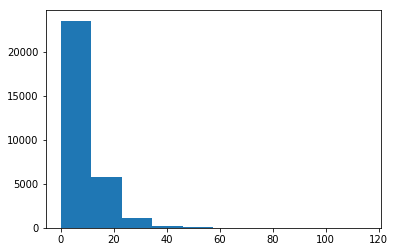

In [12]:
plt.hist(df['Fare'])
plt.show()

INTERPRETATION - The fares are very right skewed. This is to be expected since there cannot be negative fares, and most riders take short trips. Very few rides are in excess of 60 dollars.

We can improve the visuals of our histogram using the following steps:

1. Use Seaborn - A popular Python library with nice defaults.
2. Make figure larger - Great for presentations later on.
3. Change number of bins - Can change interpretation of the graph.
4. Create labels for y and x - All graphs should have the axes labeled.
5. Give the histogram a title - All graphs should be titled.
6. Change the limit of x - Since many bars are invisible, limiting x can show more information about the distribution of larger values.

Let's do this now by running the next two cells.

In [19]:
# Run this cell to improve your visuals with Seaborn
import seaborn as sns;

# This sets up the seaborn dark grid
sns.set()

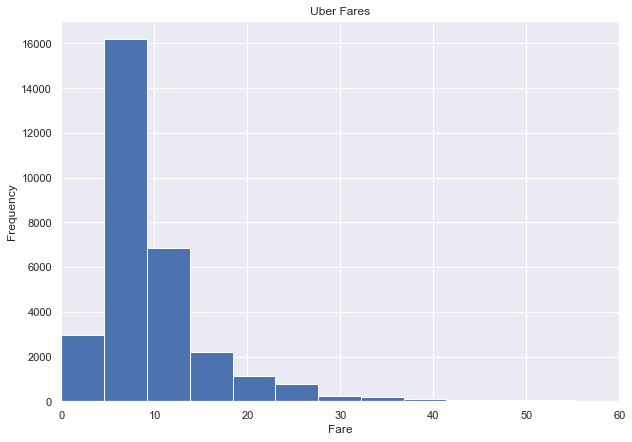

In [31]:
plt.figure(figsize=(10,7))
plt.xlim(0,60)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Uber Fares')
plt.hist(df['Fare'], bins=25)
plt.savefig('Uber_Fares_Hist', dpi=300)
plt.show()

INTERPRETATION - The overall distribution of fares is right skeweed and unimodal with a peak at around $10. There are very few fares at over $40.

The code above this histogram may be copied and modified to generate new histograms of other columns. Also notice that we added the following line:

plt.savefig('Uber_Fares_Hist', dpi=300)

This will save the figure to your computer uder the title 'Uber_Fares_Hist'. The parameter dpi=300 means that the figure is saved with 300 dots per square inch, so it will look rather crisp. We recommend saving the figures that you create so that you can use them in the project presentation.

##### Display a histogram of df['Trip Seconds'] using only plt.hist() and plt.show()

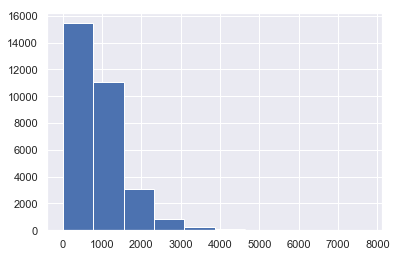

In [32]:
plt.hist(df['Trip Seconds'])
plt.show()

##### Improve the histogram of df['Trip Seconds'] by making it larger and adding labels in the cell below. 
You also may want to change the number of bins and xlim. Be sure to interpret the graph in the provided cell.

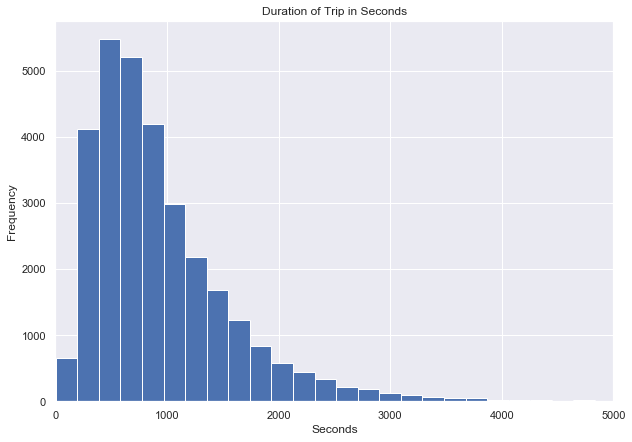

In [34]:
plt.figure(figsize=(10,7))
plt.xlim(0,5000)
plt.xlabel('Seconds')
plt.ylabel('Frequency')
plt.title('Duration of Trip in Seconds')
plt.hist(df['Trip Seconds'], bins=40)
plt.show()

Trip Seconds peak at around 5-7 thousand. The distribution is unimodal and very right skewed. This indicates that most trips are about 10 minutes long. 

##### Display a histogram of df['Trip Seconds'] using only plt.hist() and plt.show()

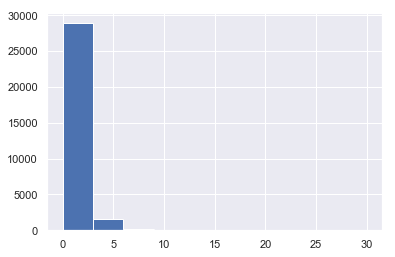

In [35]:
plt.hist(df['Tip'])
plt.show()

##### Improve the histogram of df['Trip Seconds'] by making it larger and adding labels in the cell below.
You may want to change the number of bins and xlim. Be sure to interpret the graph in the provided cell.

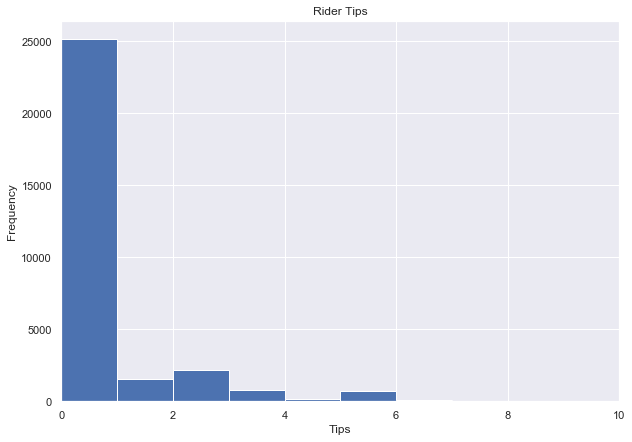

In [43]:
plt.figure(figsize=(10,7))
plt.xlim(0,10)
plt.xlabel('Tips')
plt.ylabel('Frequency')
plt.title('Rider Tips')
plt.hist(df['Tip'], bins=30)
plt.show()

Most riders do not tip. The distribution of tips is right skewed, starting with a peak at 0, before swiftly dropping to \\$6. Very few riders tip more than \\$6.

##### Choose another column to explore on your own. 
The output should be a histogram saved to a file that is appropriately labeled.

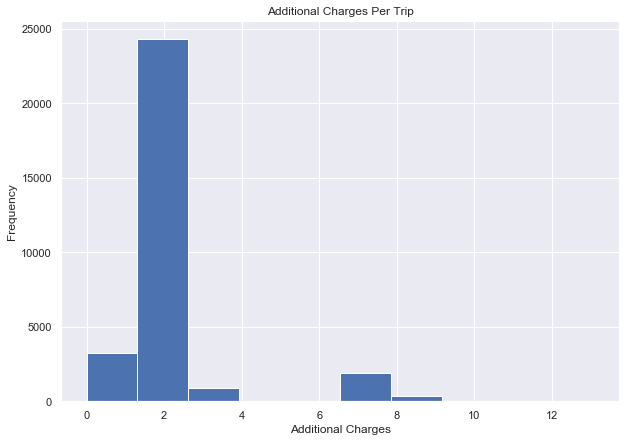

In [49]:
plt.figure(figsize=(10,7))
plt.xlabel('Additional Charges')
plt.ylabel('Frequency')
plt.title('Additional Charges Per Trip')
plt.hist(df['Additional Charges'])
plt.show()

There is usually an additional fee of around \\$2 per trip. This distribution is not continuous. Additional fees may be under \\$2, or a  little beyond \\$8, with scattered values in between.

### 7. Box Plots

Now we will examine the same columns using Box Plots. Let's do the first one together.

##### Display a boxplot of df['Fare'].

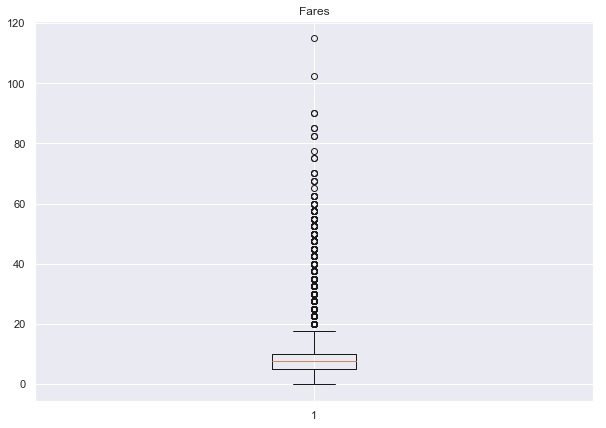

In [191]:
plt.figure(figsize=(10,7))
plt.boxplot(df['Fare'])
plt.title('Fares')
plt.show()

In a box plot, each circle represents an outlier. The presence of outliers distorts the box itself. Generally speaking, the box should be the main piece of the diagram, not the outliers. Viewing the outliers, however, gives a better sense of the distribution of the data. Let's zoom in on the box by changing the y-limit below.

##### Display a boxplot of df['Fare'] by zooming in.

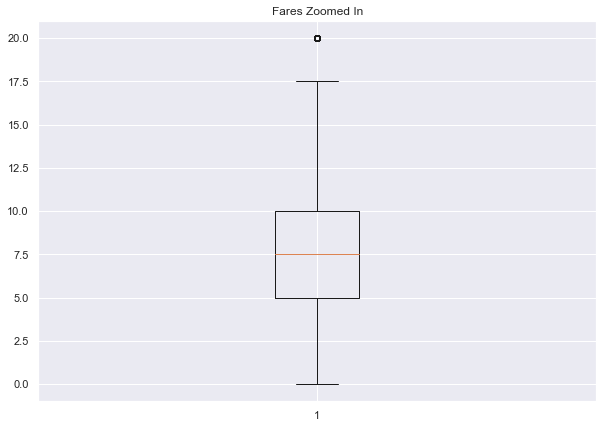

In [50]:
plt.figure(figsize=(10,7))
plt.boxplot(df['Fare'])
plt.title('Fares Zoomed In')
plt.ylim(-1,21)
plt.show()

INTERPRETATION - The median fare is around \\$7.50. The first and third quartiles, are about \\$5-\\$10. Rides beyond \\$17.50 are considered outliers, and the minimum is \\$0.

##### Display a boxplot of df['Trip Seconds'].

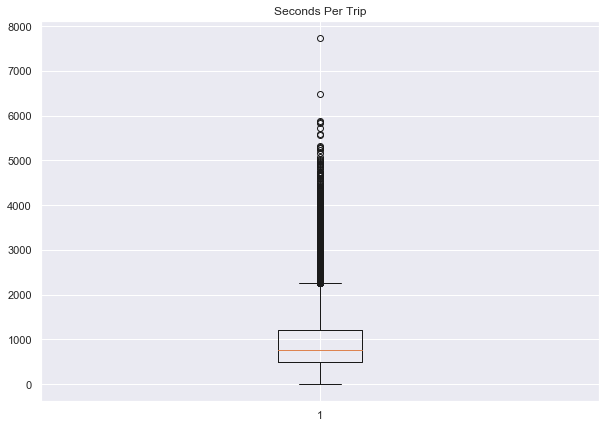

In [193]:
plt.figure(figsize=(10,7))
plt.boxplot(df['Trip Seconds'])
plt.title('Seconds Per Trip')
plt.show()

##### Display a boxplot of df['Trip Seconds'] by zooming in.
Be sure to include your interpretation.

In [ ]:
##### Display a boxplot of df['Trip Seconds'].

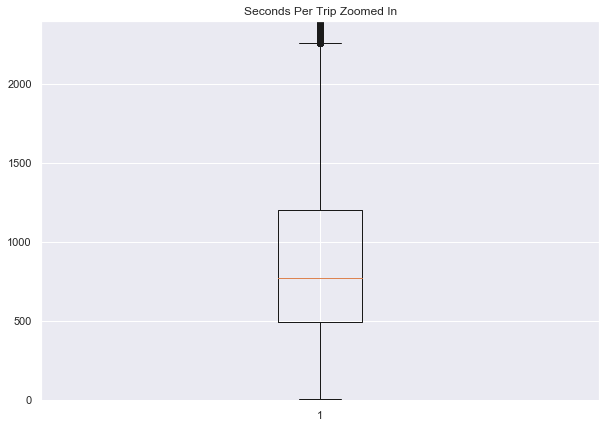

In [53]:
plt.figure(figsize=(10,7))
plt.boxplot(df['Trip Seconds'])
plt.title('Seconds Per Trip Zoomed In')
plt.ylim(-10,2400)
plt.show()

INTERPRETATON - The median trip is about 750 seconds. The first and third quartiles are about 500 and 1200 seconds. Trips beyond 2300 seconds are considered outliers, and no trip can be less than 0 seconds.

##### Display a boxplot of df['Tip'].

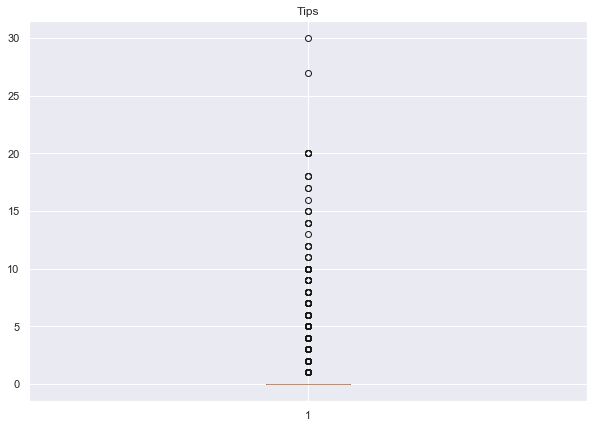

In [194]:
plt.figure(figsize=(10,7))
plt.boxplot(df['Tip'])
plt.title('Tips')
plt.show()

##### Display a boxplot of df['Tips'] by zooming in.
Be sure to include your interpretation in the cell below.

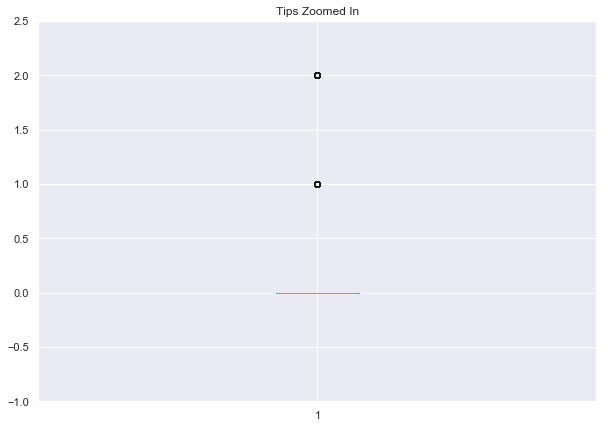

In [55]:
plt.figure(figsize=(10,7))
plt.boxplot(df['Tip'])
plt.title('Tips Zoomed In')
plt.ylim(-1, 2.5)
plt.show()

In [ ]:
All tips are considered outliers! Ouch.

### 8. Column Analysis - Tips

Occasionally, you will find peculiar information that needs further analysis. Let's consider the box plot of tips given above. Even with zooming in, the box plot indicates that all tips are outliers.

Some questions immediately arise. 

1. How are these outliers determined?
2. How likely is it that a driver receives a tip?
3. What is the mean tip?
4. What is the median tip?
5. Is there a way to earn more tips?

1. How are these outliers determined?

There is not a universal way to describe outliers. We know from the histogram that there are some fares with decent frequency, so we can conclude that the Python boxplot is determining outliers liberally. Let's check to see if it's 1.5 * IQR by examining the boxplot above.

##### What is the IQR of the Fare Box Plot above?
Set the value equal to the variable IQR in the cell below.

In [61]:
IQR = 5

5.0

##### Now multiply IQR by 1.5

In [63]:
IQR * 1.5

7.5

##### Go back to the boxplot and find the third quartile. Add 1.5 * IQR to the third quartile. What do you get?

In [65]:
17.5

17.5

So it appears that the boxplots do use 1.5 * IQR to calculate the outliers. So what's the issue? 

##### Use .describe() on df['Tip'] in the cell below. 
Then answer the question, Why are all tips outliers?' in the cell below.

In [66]:
df['Tip'].describe()

count    30804.000000
mean         0.479775
std          1.323945
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         30.000000
Name: Tip, dtype: float64

Since the first and third quartiles both have a value of 0, this makes IQR = 0, and 1.5 * IQR = 0. 

The next question is whether all tips should be outliers. It seems like it's important to get more information on tips. Let's start by calculating what percentage of riders actually tip. To do this, we need to figure out the number of tippers, and the number of rides. Execute the following two cells to reveal this information 

In [72]:
# Compute number of rides where there could have been a tip.
len(df['Tip'])

30804

In [73]:
# Computer number of rides were there was a tip.
len(df[df['Tip'] != 0])

5642

##### What percentage of riders tip?

In [71]:
len(df[df['Tip'] != 0])/len(df['Tip'])

0.18315803142449033

##### Provide your own analysis. Should all tips be considered outliers?

Although the majority of riders do not tip, 18% of riders do tip. The histogram reveals that most tips are around \\$2, very close to the median of 0. Tipping in itself is not an outlier. Low tips are not uncommon enough. Very high tips may be considered outliers. The question is how high?

Outliers are open to interpretation. Let's follow the train of thought where all tips are not considered outliers. Outliers should be rare, and 0 is one reason why 1.5 * IQR is not a universal method to determine outliers.

Let's analyze the distribution of tippers. Let's work with a new dataFrame that only includes the 18% who tip. We can achieve this by running the following cell.

In [74]:
# Create DataFrame of Tippers
df_tippers = df[df['Tip'] != 0]

Now we can create boxplots and histograms using the new dataFrame. Instead of df, you should use df_tippers.

##### Display a histogram of df_tippers['Trip Seconds'] using only plt.hist() and plt.show()

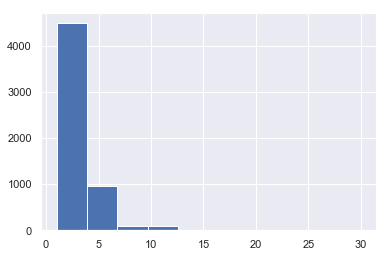

In [76]:
plt.hist(df_tippers['Tip'])
plt.show()

##### Improve the histogram of df_tippers['Trip Seconds'] by making it larger and adding labels in the cell below.
You may want to change the number of bins and xlim. Be sure to interpret the graph in the provided cell.

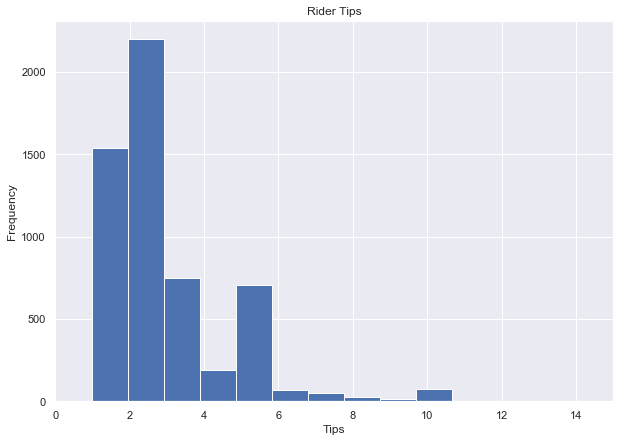

In [77]:
plt.figure(figsize=(10,7))
plt.xlim(0,15)
plt.xlabel('Tips')
plt.ylabel('Frequency')
plt.title('Rider Tips')
plt.hist(df_tippers['Tip'], bins=30)
plt.show()

This histogram gives a much clearer distribution of tips. The tips distribution is right-skewed and unimodal with a peak of around \\$2. Most riders tip less than \\$6, and very few riders tip more than \\$11.

##### Display a boxplot of df['Tip'].

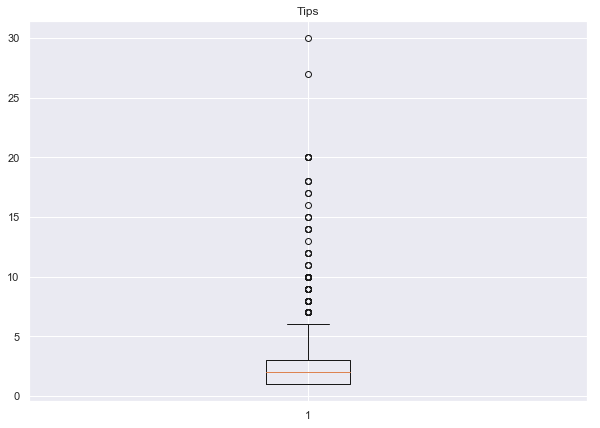

In [78]:
plt.figure(figsize=(10,7))
plt.boxplot(df_tippers['Tip'])
plt.title('Tips')
plt.show()

##### Display a boxplot of df_tippers['Tip'] zoomed in.
Be sure to include your interpretation in the cell below.

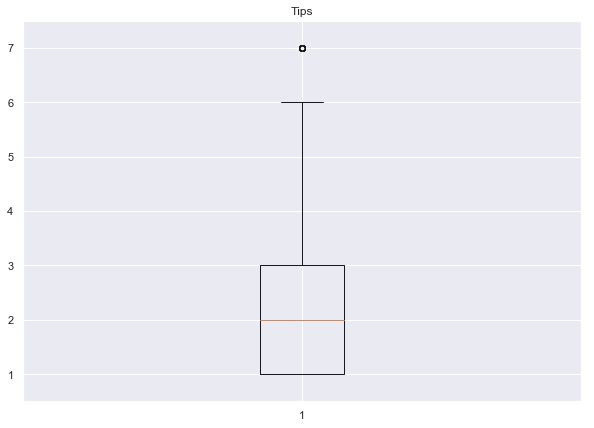

In [81]:
plt.figure(figsize=(10,7))
plt.ylim(0.5, 7.5)
plt.boxplot(df_tippers['Tip'])
plt.title('Tips')
plt.show()

When restricting the range to tippers, the median tip is \\$2, and the quartile range is \\$1-\\$3. Tips greater than $6 are considered outliers.

The boxplot indicates that tips over \\$6 should be considered outliers, while the histogram suggests that tips beyond \\$11 are rare.

In [84]:
df_tippers['Tip'].quantile(0.9)

5.0

In [85]:
df['Tip'].quantile(0.9)

2.0

In [86]:
df['Tip'].quantile(0.99)

5.0

#### Scatter Plots

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30804 entries, 3 to 45337
Data columns (total 21 columns):
Trip ID                       30804 non-null object
Trip Start Timestamp          30804 non-null datetime64[ns]
Trip End Timestamp            30804 non-null datetime64[ns]
Trip Seconds                  30804 non-null float64
Trip Miles                    30804 non-null float64
Pickup Census Tract           30804 non-null float64
Dropoff Census Tract          30804 non-null float64
Pickup Community Area         30804 non-null float64
Dropoff Community Area        30804 non-null float64
Fare                          30804 non-null float64
Tip                           30804 non-null int64
Additional Charges            30804 non-null float64
Trip Total                    30804 non-null float64
Shared Trip Authorized        30804 non-null bool
Trips Pooled                  30804 non-null int64
Pickup Centroid Latitude      30804 non-null float64
Pickup Centroid Longitude     30804 n

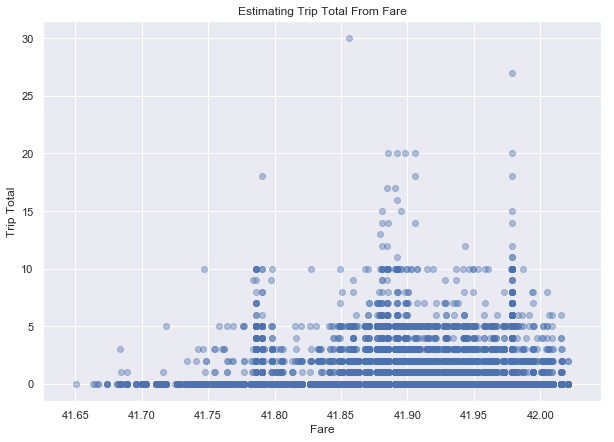

In [58]:
plt.figure(figsize=(10,7))
plt.scatter(df['Pickup Centroid Latitude'], df['Tip'], alpha = 0.4)
plt.xlabel('Fare')
plt.ylabel('Trip Total')
plt.title('Estimating Trip Total From Fare')
plt.show()

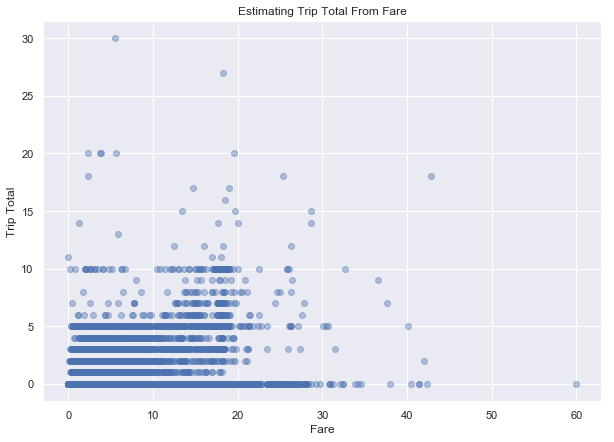

In [56]:
plt.figure(figsize=(10,7))
plt.scatter(df['Trip Miles'], df['Tip'], alpha = 0.4)
plt.xlabel('Fare')
plt.ylabel('Trip Total')
plt.title('Estimating Trip Total From Fare')
plt.show()

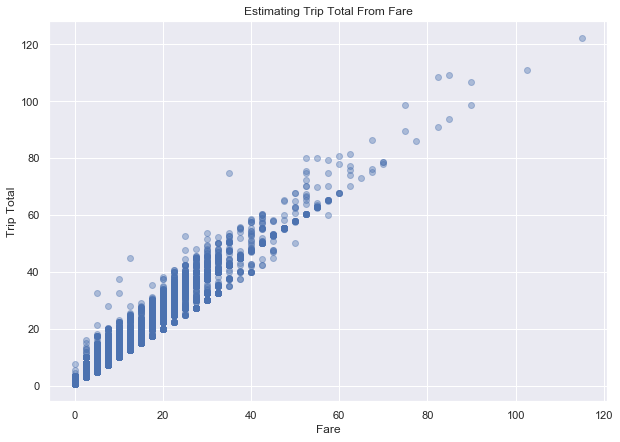

In [195]:
plt.figure(figsize=(10,7))
plt.scatter(df['Fare'], df['Trip Total'], alpha = 0.4)
plt.xlabel('Fare')
plt.ylabel('Trip Total')
plt.title('Estimating Trip Total From Fare')
plt.show()

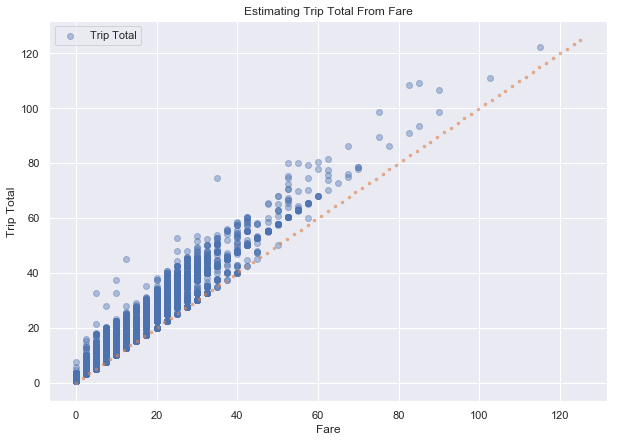

In [196]:
plt.figure(figsize=(10,7))
plt.scatter(df['Fare'], df['Trip Total'], alpha = 0.4)
x = np.linspace(0,125,75)
y = x
plt.xlabel('Fare')
plt.ylabel('Trip Total')
plt.title('Estimating Trip Total From Fare')
plt.scatter(x, y, alpha=0.6, marker=".", linewidths=0.5)
plt.legend(loc='upper left')
plt.show()

Hypothesis: Riders who take longer trips are more likely to tip.

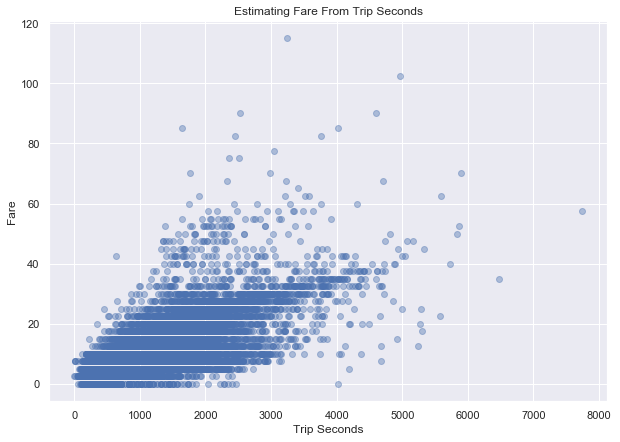

In [197]:
plt.figure(figsize=(10,7))
plt.scatter(df['Trip Seconds'], df['Fare'], alpha = 0.4)
plt.ylabel('Fare')
plt.xlabel('Trip Seconds')
plt.title('Estimating Fare From Trip Seconds')
plt.show()

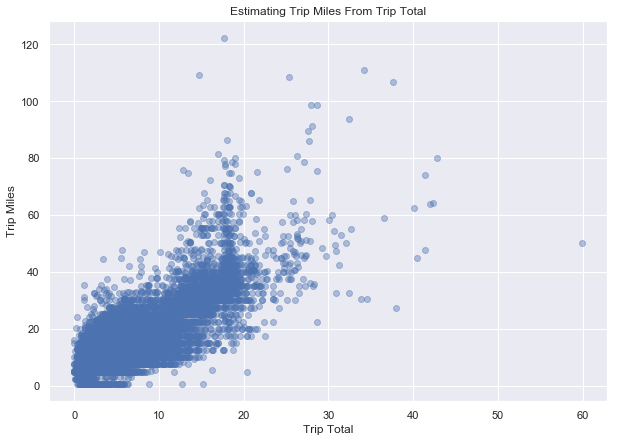

In [198]:
plt.figure(figsize=(10,7))
plt.scatter(df['Trip Miles'], df['Trip Total'], alpha = 0.4)
plt.ylabel('Trip Miles')
plt.xlabel('Trip Total')
plt.title('Estimating Trip Miles From Trip Total')
plt.show()